## 1. Install Dependencies and Setup (Python 3.9.13)

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached matplotlib-3.8.4-cp39-cp39-win_amd64.whl.metadata (5.9 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl.metadat

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
google-pasta                 0.2.0
grpcio                       1.63.0
h5py                         3.11.0
idna                         3.7
importlib_metadata           7.1.0
importlib_resources          6.4.0
ipykernel                    6.29.4
ipython                      8.18.1
jedi                         0.19.1
jupyter_client               8.6.1
ju

In [3]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices("GPU")

In [6]:
gpus

[]

In [7]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices("GPU")

[]

## 2. Remove Dodgy Images

In [9]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [10]:
data_dir = "data"

In [11]:
os.listdir(os.path.join(data_dir, "happy"))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Supremely-Happy-People-2.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principle

In [12]:
image_exts = ["jpeg", "jpg", "png"]

In [13]:
image_exts

['jpeg', 'jpg', 'png']

In [14]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

happy
05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Supremely-Happy-People-2.jpg
11-Habits-of-Truly-Happy-People.jpg
13ryLrJDyVF05wXDYYUXcJQ.jpeg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
227-2271622_happy-people-business-team-celebrating-png.png
35438_hd.jpg
360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg
56f455011e0000b300705475.jpeg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
7Y57w0983emdERAoQylUHI

In [15]:
img = cv2.imread(os.path.join("data", "happy", "_happy_jumping_on_beach-40815.jpg"))

In [16]:
img.shape

(213, 320, 3)

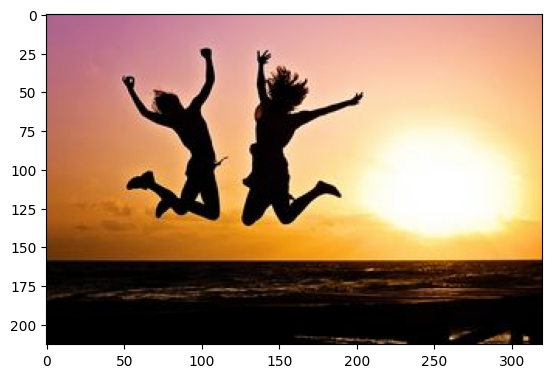

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)

        except Exception as e:
            print("Issue with image {}".format(image_path))

## 3. Load Data

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [22]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 295 files belonging to 2 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

In [25]:
batch[0].shape

(32, 256, 256, 3)

In [27]:
batch[1]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

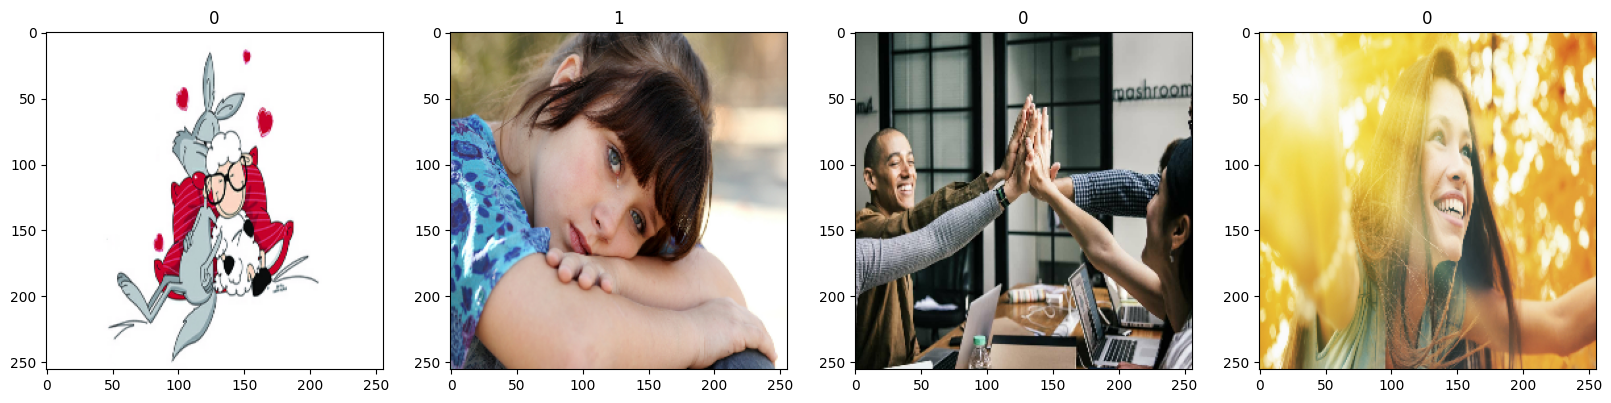

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [29]:
data = data.map(lambda x,y: (x/255, y))

In [30]:
scaled_iterator = data.as_numpy_iterator()

In [31]:
batch = scaled_iterator.next()

In [32]:
batch[0].max()

1.0

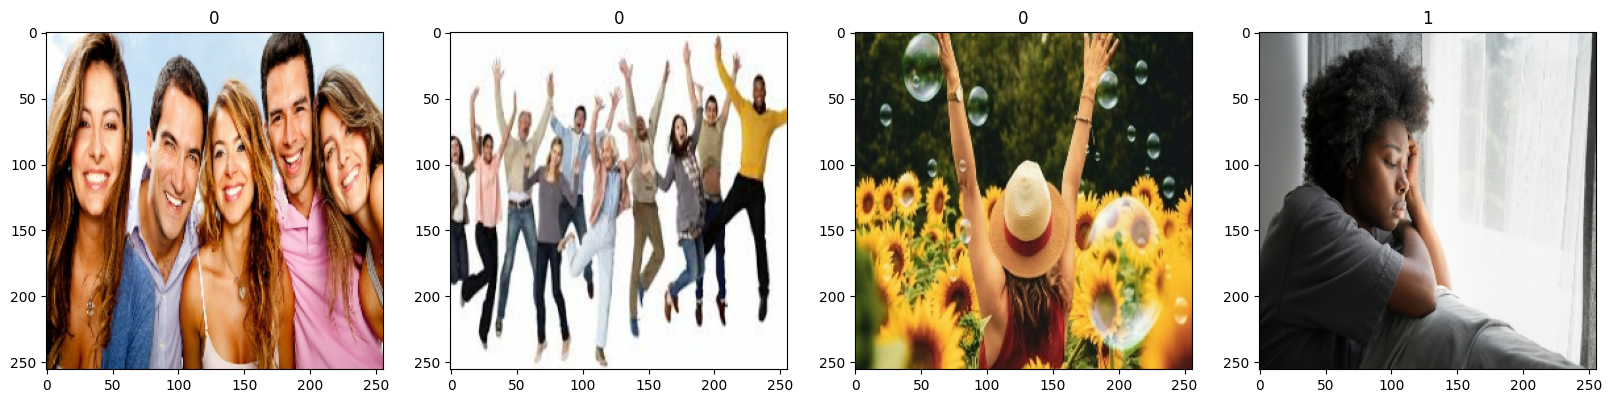

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 5. Split Data

In [34]:
len(data)

10

In [35]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [36]:
train_size+val_size+test_size

10

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6. Build Deep Learning Model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

f:\Tutorial\learn-happy-sad-image-classification\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train

In [43]:
logdir = "logs"

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - accuracy: 0.5678 - loss: 1.4032 - val_accuracy: 0.5625 - val_loss: 0.6842
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.5832 - loss: 0.6504 - val_accuracy: 0.7656 - val_loss: 0.5205
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.6767 - loss: 0.5998 - val_accuracy: 0.8125 - val_loss: 0.4371
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.7999 - loss: 0.4446 - val_accuracy: 0.9062 - val_loss: 0.3547
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.8520 - loss: 0.3826 - val_accuracy: 0.8438 - val_loss: 0.3691
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.8841 - loss: 0.3311 - val_accuracy: 0.9062 - val_loss: 0.2685
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.8150 - loss: 0.3516 - val_accuracy: 0.8281 - val_loss: 0.3593
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.8374 - loss: 0.3674 - val_accuracy: 0.8906 - val_loss:

In [46]:
hist.history

{'accuracy': [0.5580357313156128,
  0.6116071343421936,
  0.7053571343421936,
  0.8035714030265808,
  0.8214285969734192,
  0.8928571343421936,
  0.8303571343421936,
  0.8482142686843872,
  0.9241071343421936,
  0.8973214030265808,
  0.9375,
  0.9285714030265808,
  0.9375,
  0.9732142686843872,
  0.9955357313156128,
  0.9955357313156128,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.1818710565567017,
  0.617542564868927,
  0.5730648040771484,
  0.42751961946487427,
  0.42024680972099304,
  0.30822500586509705,
  0.3497239053249359,
  0.35222598910331726,
  0.25009265542030334,
  0.22317194938659668,
  0.1734069138765335,
  0.15696260333061218,
  0.1613764613866806,
  0.1168794110417366,
  0.06312038749456406,
  0.054046664386987686,
  0.02334209717810154,
  0.015064151026308537,
  0.009478376246988773,
  0.008108936250209808],
 'val_accuracy': [0.5625,
  0.765625,
  0.8125,
  0.90625,
  0.84375,
  0.90625,
  0.828125,
  0.890625,
  0.9375,
  0.96875,
  1.0,
  0.890625,
  1.0,
  1.0,
  1.0,


## 8. Plot Performance

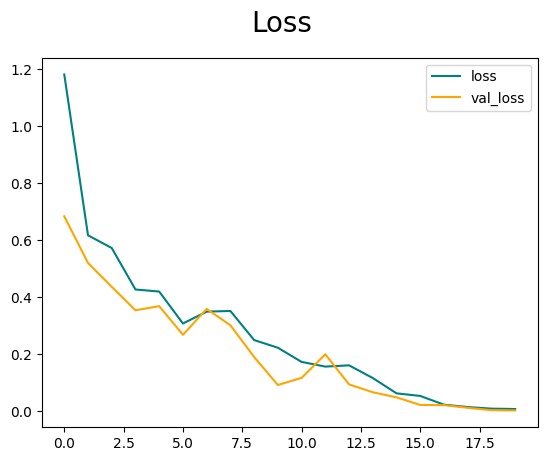

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'], color="teal", label="loss")
plt.plot(hist.history['val_loss'], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

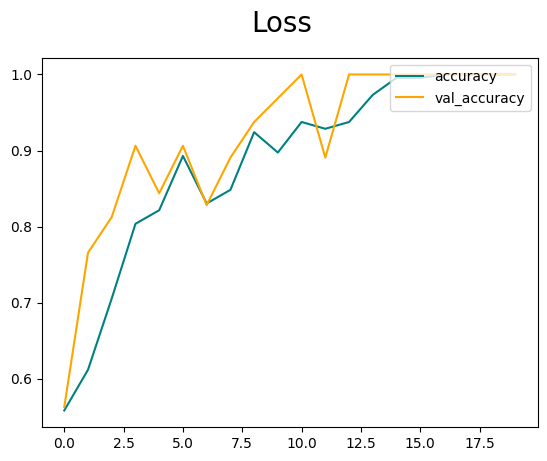

In [48]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

## 9. Evaluate

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [51]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [52]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:1.0, Recall:1.0, Accuracy:1.0


## 10. Test

In [53]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

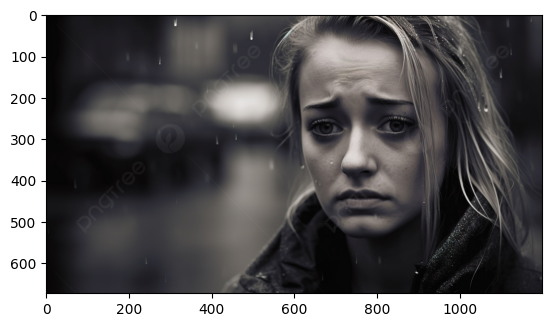

In [74]:
img = cv2.imread("pngtree-woman-looking-sad-in-the-rain-picture-image_2771069.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

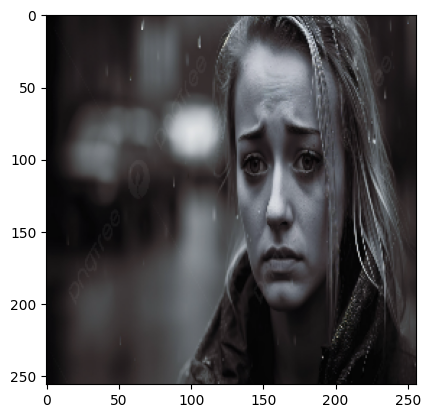

In [75]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
resize.shape

TensorShape([256, 256, 3])

In [77]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [78]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [79]:
yhat

array([[0.99994487]], dtype=float32)

In [80]:
if yhat > 0.5:
    print(f"Predicted class is SAD")
else:
    print(f"Predicted class is HAPPY")

Predicted class is SAD


## 11. Save the Model

In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save(os.path.join("models", "HappSadImageClassification.h5"))

In [83]:
new_model = load_model(os.path.join("models", "HappSadImageClassification.h5"))

In [84]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [85]:
if yhat_new > 0.5:
    print(f"Predicted class is SAD")
else:
    print(f"Predicted class is HAPPY")

Predicted class is SAD
